# Sanity Checking the Subspace Network Digital Twin

This notebook performs a simulation run with the default parameter set
for a single run. It is meant to provide quick diagnostics on the model
capabilities.



## Part 1. Dependences & Set-up

In [21]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from cadCAD_tools import easy_run

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [22]:
from subspace_model.params import INITIAL_STATE
from subspace_model.params import SINGLE_RUN_PARAMS
from subspace_model.params import TIMESTEPS
from subspace_model.params import SAMPLES
from subspace_model.structure import SUBSPACE_MODEL_BLOCKS

default_run_args = (INITIAL_STATE,
                     {k: [v] for k, v in SINGLE_RUN_PARAMS.items()},
                    SUBSPACE_MODEL_BLOCKS,
                    TIMESTEPS,
                    SAMPLES)
sim_df = easy_run(*default_run_args)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 38, 1, 32)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 38, 1, 32)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/9114 [00:00<?, ?it/s]

Total execution time: 0.48s


In [23]:
sim_df.head(5)

,days_passed,delta_days,delta_blocks,circulating_supply,user_supply,issued_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,avg_compute_weights_per_tx,std_compute_weights_per_tx,min_compute_weights_per_tx,avg_transaction_size,std_transaction_size,min_transaction_size,avg_transaction_count_per_day,avg_slash_per_day,avg_new_sectors_per_day,std_new_sectors_per_day
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.320000e+09,...,1000,1000,10,25000,25000,100,1440.0,1,10,5
13,1,1.0,14400.0,2.640000e+07,2.640000e+07,26400000.0,3.000000e+09,5.818587,0.0,1.293600e+09,...,1000,1000,10,25000,25000,100,1440.0,1,10,5
26,2,1.0,14400.0,4.917781e+07,5.227200e+07,52272000.0,3.000000e+09,15.063506,0.0,1.267728e+09,...,1000,1000,10,25000,25000,100,1440.0,1,10,5
39,3,1.0,14400.0,6.902963e+07,7.753838e+07,77626560.0,3.000000e+09,7.821574,0.0,1.242373e+09,...,1000,1000,10,25000,25000,100,1440.0,1,10,5
52,4,1.0,14400.0,8.563027e+07,1.023050e+08,102474028.8,3.000000e+09,0.035934,0.0,1.217526e+09,...,1000,1000,10,25000,25000,100,1440.0,1,10,5


## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

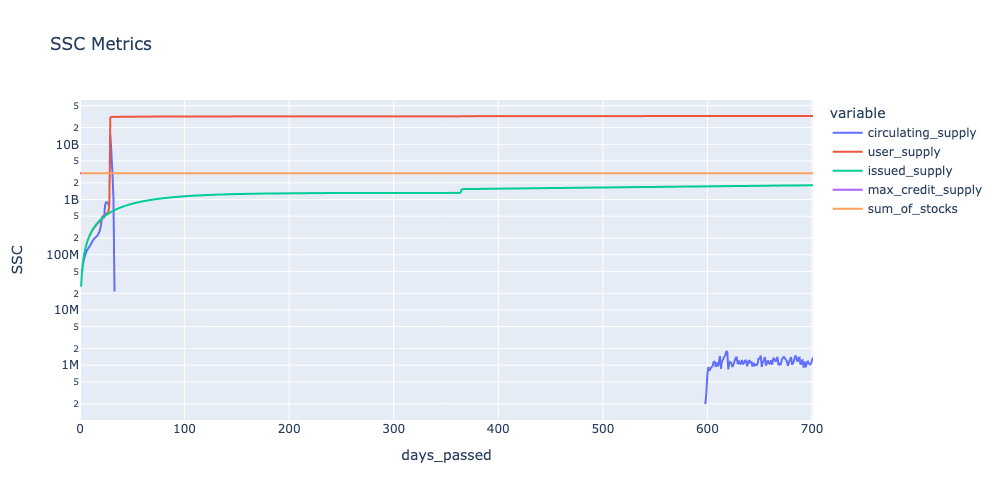

In [24]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "supply" in el] + ['sum_of_stocks'],
        title='SSC Metrics',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

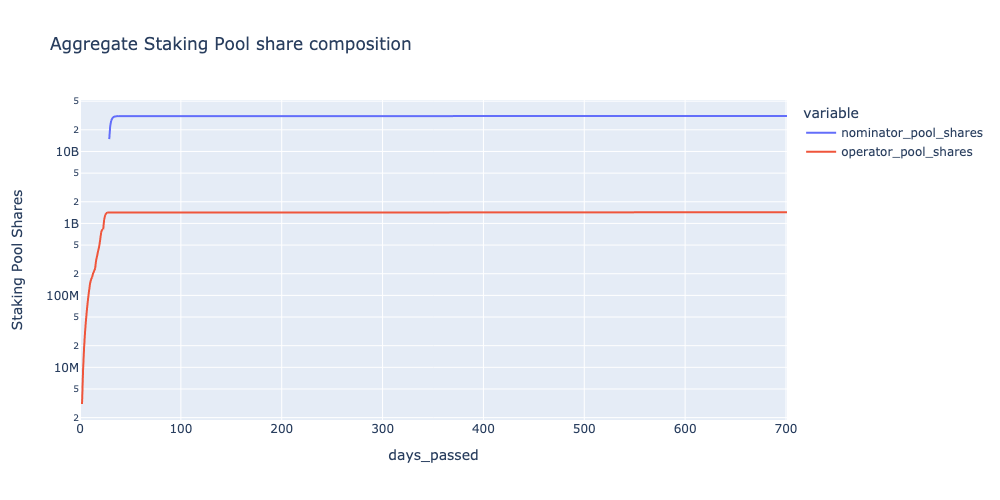

In [25]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True,
        labels={'value': 'Staking Pool Shares'},
        title='Aggregate Staking Pool share composition'
        )
fig.update_layout(width=1000, height=500)
fig.show()

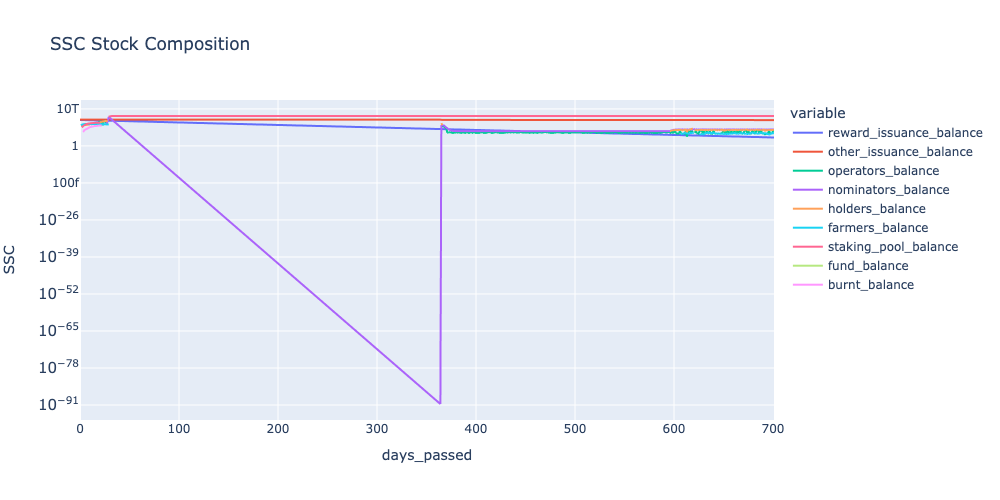

In [26]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        title='SSC Stock Composition',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

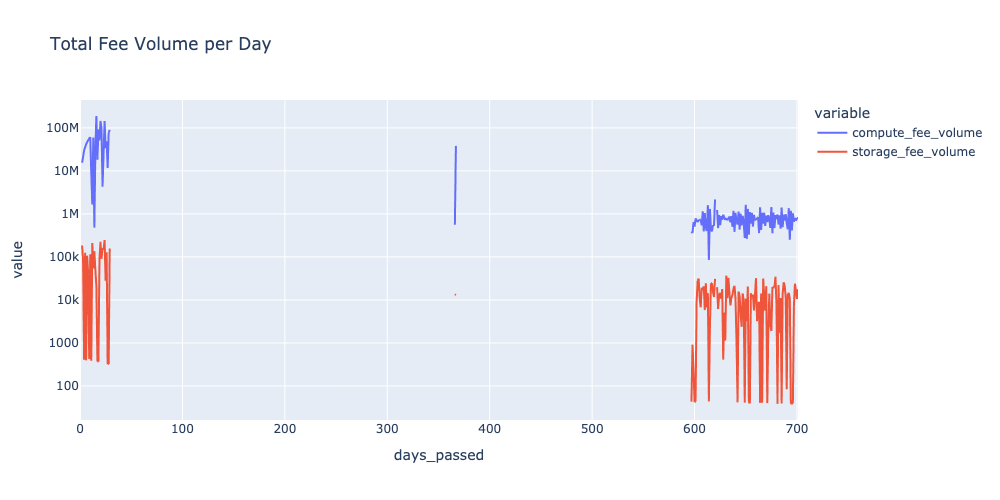

In [27]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        title='Total Fee Volume per Day',
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

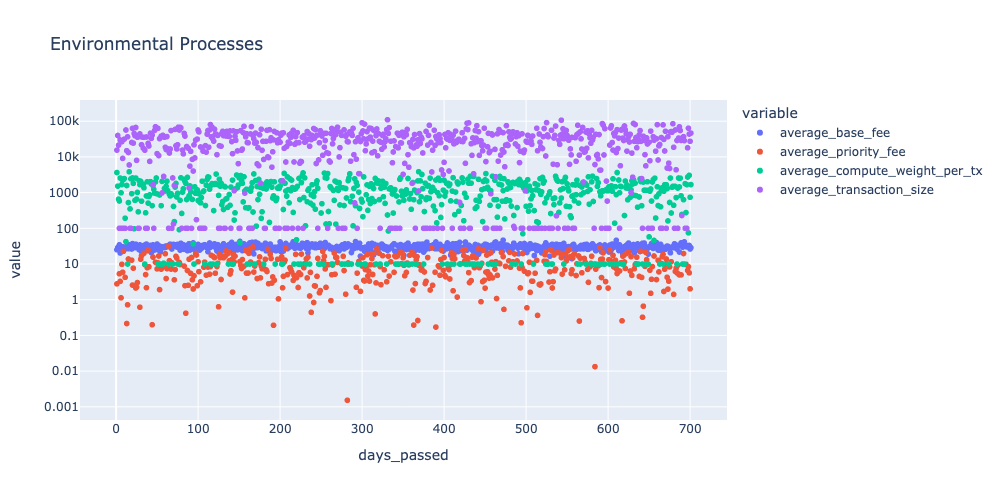

In [28]:
fig_df = sim_df.melt(id_vars=['days_passed'], value_vars=[el for el in sim_df.columns if "average" in el])


fig = px.scatter(fig_df, 
        x='days_passed', 
        y='value',
        color='variable',
        title='Environmental Processes',
        log_y=True)

fig.update_layout(width=1000, height=500)
fig.show()

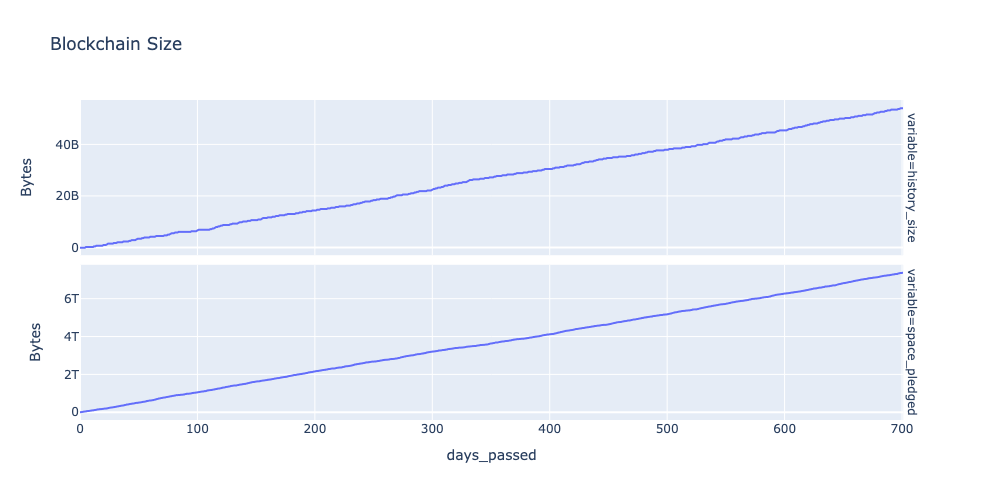

In [35]:
fig_df = sim_df.melt(id_vars=['days_passed'], 
                     value_vars=['history_size', 'space_pledged'])

fig = px.line(fig_df, 
        x='days_passed', 
        y='value',
        facet_row='variable',
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

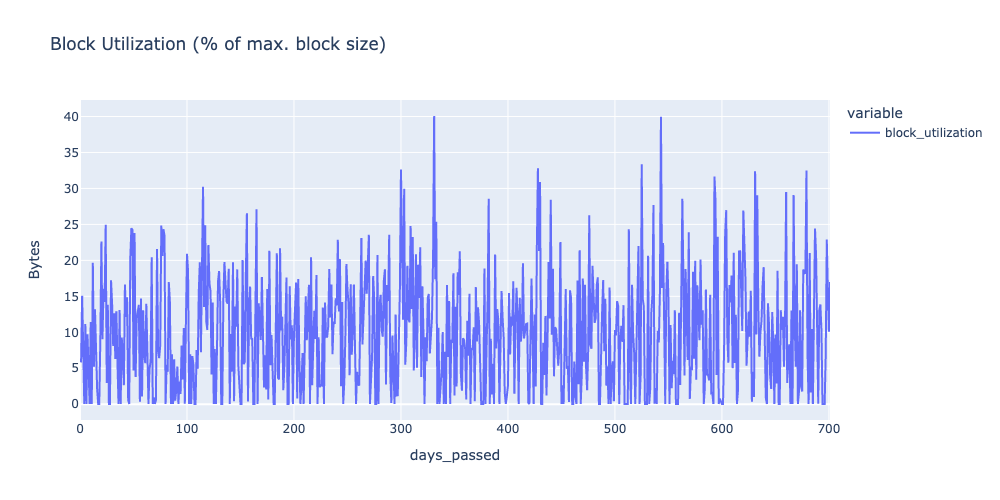

In [37]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['block_utilization'],
        title='Block Utilization (% of max. block size)',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.show()